In [9]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '38a2dae9-8213-48a7-8608-b0b11d5a653f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-21T09:09:07.147Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 8752}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10759, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [23]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10759,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.960406e+07,1.960406e+07,False,NaN,1,NaN,NaN,None,2024-01-21T09:08:00.000Z,41693.639519,1.003313e+10,-56.3168,0.088072,0.309454,-2.937114,-4.574635,14.096123,36.064625,8.173644e+11,49.7251,8.755664e+11,None,2024-01-21T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:08:33.976486
1,1027,Ethereum,ETH,ethereum,8294,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201769e+08,1.201769e+08,True,NaN,2,NaN,NaN,None,2024-01-21T09:08:00.000Z,2474.524520,4.812695e+09,-52.7720,0.041076,-0.020394,-2.958721,7.098763,23.431730,47.277030,2.973808e+11,18.0914,2.973808e+11,None,2024-01-21T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:08:33.976486
2,825,Tether USDt,USDT,tether,72228,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.492935e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-21T09:07:00.000Z,0.999442,2.357793e+10,-44.6554,0.000910,0.009840,-0.044573,-0.083558,-0.083540,-0.079941,9.487634e+10,5.7730,9.854572e+10,None,2024-01-21T09:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-21 23:08:33.976486
3,1839,BNB,BNB,bnb,2023,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495487e+08,1.495487e+08,False,NaN,4,NaN,NaN,None,2024-01-21T09:07:00.000Z,318.121914,7.032036e+08,-22.1429,0.210979,1.533896,4.388873,18.537183,34.730757,44.238413,4.757473e+10,2.8943,4.757473e+10,None,2024-01-21T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:08:33.976486
4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.329074e+08,5.675581e+08,True,NaN,5,NaN,NaN,None,2024-01-21T09:08:00.000Z,92.763412,1.011211e+09,-58.3464,0.445702,0.877736,-4.929540,0.714355,69.146498,207.532280,4.015797e+10,2.4430,5.264862e+10,None,2024-01-21T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:08:33.976486
5,52,XRP,XRP,xrp,1209,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,None,2024-01-21T09:08:00.000Z,0.551756,6.408241e+08,-45.1472,-0.043072,0.623713,-4.587778,-11.864609,-7.361539,3.381546,2.998232e+10,1.8240,5.517557e+10,None,2024-01-21T09:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:08:33.976486
6,3408,USDC,USDC,usd-coin,16289,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.574638e+10,2.574638e+10,False,NaN,7,NaN,NaN,None,2024-01-21T09:08:00.000Z,1.000071,2.352377e+09,-55.9317,0.018318,-0.043342,-0.011553,0.014995,0.012749,0.020491,2.574820e+10,1.5664,2.574820e+10,None,2024-01-21T09:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-21 23:08:33.976486
7,2010,Cardano,ADA,cardano,1033,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.540465e+10,3.655708e+10,False,NaN,8,NaN,NaN,None,2024-01-21T09:07:00.000Z,0.515380,2.825224e+08,-33.5428,0.018595,0.310734,-5.574551,-15.885229,39.133530,94.587669,1.824683e+10,1.1103,2.319208e+10,None,2024-01-21T09:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:08:33.976486
8,74,Dogecoin,DOGE,dogecoin,879,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN

In [25]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '38a2dae9-8213-48a7-8608-b0b11d5a653f',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"H:\Data Science\data analyst bootcamp\Python Projects Material\Automating Crypto Website Api\API.csv"):
        df.to_csv(r"H:\Data Science\data analyst bootcamp\Python Projects Material\Automating Crypto Website Api\API.csv", header="column_names")
    else:
        df.to_csv(r"H:\Data Science\data analyst bootcamp\Python Projects Material\Automating Crypto Website Api\API.csv",mode="a", header=False)
        

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner Completed Successfully")
    sleep(60)
exit()

API Runner Completed Successfully
API Runner Completed Successfully


In [27]:
df3 = pd.read_csv(r"H:\Data Science\data analyst bootcamp\Python Projects Material\Automating Crypto Website Api\API.csv")
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10759,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.960406e+07,1.960406e+07,False,NaN,1,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,41669.514249,9.943299e+09,-56.4753,-0.033937,0.425683,-2.707858,-4.533253,13.828810,36.421094,8.168915e+11,49.6820,8.750598e+11,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
1,1,1027,Ethereum,ETH,ethereum,8294,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201769e+08,1.201769e+08,True,NaN,2,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,2473.584810,4.739012e+09,-53.3952,-0.051682,0.278132,-2.660399,6.801187,23.148772,47.977348,2.972678e+11,18.0794,2.972678e+11,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
2,2,825,Tether USDt,USDT,tether,72228,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.492935e+10,9.860077e+10,True,NaN,3,NaN,NaN,NaN,2024-01-21T09:38:00.000Z,0.999376,2.329685e+10,-45.1525,0.005890,0.006619,-0.081756,-0.093857,-0.069687,-0.091251,9.487013e+10,5.7703,9.853926e+10,NaN,2024-01-21T09:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-21 23:38:56.471723
3,3,1839,BNB,BNB,bnb,2023,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495487e+08,1.495487e+08,False,NaN,4,NaN,NaN,NaN,2024-01-21T09:38:00.000Z,318.624459,6.991121e+08,-23.2045,0.356266,1.487952,4.867616,18.419530,34.299093,45.303515,4.764989e+10,2.8980,4.764989e+10,NaN,2024-01-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
4,4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.329074e+08,5.675581e+08,True,NaN,5,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,92.981158,1.001414e+09,-58.7295,0.222965,1.454207,-4.323816,1.334097,68.904668,215.115508,4.025223e+10,2.4481,5.277221e+10,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
5,5,52,XRP,XRP,xrp,1209,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.433984e+10,9.998798e+10,False,NaN,6,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,0.551735,6.329705e+08,-45.8676,-0.082381,1.041195,-4.516336,-11.471007,-7.405097,4.729804,2.998118e+10,1.8234,5.517347e+10,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
6,6,3408,USDC,USDC,usd-coin,16290,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.574638e+10,2.574638e+10,False,NaN,7,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,0.999926,2.324591e+09,-56.2051,-0.004892,-0.015609,-0.026499,-0.042302,-0.006321,-0.002942,2.574446e+10,1.5657,2.574446e+10,NaN,2024-01-21T09:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-21 23:38:56.471723
7,7,2010,Cardano,ADA,cardano,1033,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.540465e+10,3.655708e+10,False,NaN,8,NaN,NaN,NaN,2024-01-21T09:38:00.000Z,0.516428,2.749217e+08,-36.1010,0.018902,0.914819,-5.255864,-15.968567,39.108875,95.842446,1.828395e+10,1.1121,2.323926e+10,NaN,2024-01-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
8,8,74,Dogecoin,DOGE,dogecoin,879,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'mediu

In [77]:
df = df3
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10759,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19604056.00,19604056.00,False,NaN,1,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,41669.51,9943299073.65,-56.48,-0.03,0.43,-2.71,-4.53,13.83,36.42,816891490822.13,49.68,875059799220.37,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
1,1,1027,Ethereum,ETH,ethereum,8294,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120176935.57,120176935.57,True,NaN,2,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,2473.58,4739011981.22,-53.40,-0.05,0.28,-2.66,6.80,23.15,47.98,297267842336.81,18.08,297267842336.81,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
2,2,825,Tether USDt,USDT,tether,72228,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,94929347996.65,98600769246.13,True,NaN,3,NaN,NaN,NaN,2024-01-21T09:38:00.000Z,1.00,23296851451.52,-45.15,0.01,0.01,-0.08,-0.09,-0.07,-0.09,94870125868.09,5.77,98539256683.83,NaN,2024-01-21T09:38:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-21 23:38:56.471723
3,3,1839,BNB,BNB,bnb,2023,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149548745.03,149548745.03,False,NaN,4,NaN,NaN,NaN,2024-01-21T09:38:00.000Z,318.62,699112141.07,-23.20,0.36,1.49,4.87,18.42,34.30,45.30,47649888004.54,2.90,47649888004.54,NaN,2024-01-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
4,4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,432907376.45,567558086.63,True,NaN,5,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,92.98,1001414192.56,-58.73,0.22,1.45,-4.32,1.33,68.90,215.12,40252229331.07,2.45,52772208339.07,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
5,5,52,XRP,XRP,xrp,1209,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,54339837528.00,99987984506.00,False,NaN,6,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,0.55,632970493.54,-45.87,-0.08,1.04,-4.52,-11.47,-7.41,4.73,29981175196.47,1.82,55173472281.77,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
6,6,3408,USDC,USDC,usd-coin,16290,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25746376539.29,25746376539.29,False,NaN,7,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,1.00,2324590617.93,-56.21,-0.00,-0.02,-0.03,-0.04,-0.01,-0.00,25744462066.84,1.57,25744462066.84,NaN,2024-01-21T09:39:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-21 23:38:56.471723
7,7,2010,Cardano,ADA,cardano,1033,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,35404649358.47,36557079073.57,False,NaN,8,NaN,NaN,NaN,2024-01-21T09:38:00.000Z,0.52,274921725.28,-36.10,0.02,0.91,-5.26,-15.97,39.11,95.84,18283949264.08,1.11,23239256193.52,NaN,2024-01-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
8,8,74,Dogecoin,DOGE,dogecoin,879,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,142741396383.71,142741396383.71,True,NaN,9,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,0.09,1163787740.05,243.40,-0.03,8.38,3.87,-7.97,14.59,34.94,12204221676.17,0.74,12204221676.17,

In [36]:
# pd.set_option('display.float_format', f"{:.2f}")
pd.options.display.float_format = '{:.2f}'.format

In [38]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10759,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19604056.00,19604056.00,False,NaN,1,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,41669.51,9943299073.65,-56.48,-0.03,0.43,-2.71,-4.53,13.83,36.42,816891490822.13,49.68,875059799220.37,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
1,1,1027,Ethereum,ETH,ethereum,8294,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120176935.57,120176935.57,True,NaN,2,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,2473.58,4739011981.22,-53.40,-0.05,0.28,-2.66,6.80,23.15,47.98,297267842336.81,18.08,297267842336.81,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
2,2,825,Tether USDt,USDT,tether,72228,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,94929347996.65,98600769246.13,True,NaN,3,NaN,NaN,NaN,2024-01-21T09:38:00.000Z,1.00,23296851451.52,-45.15,0.01,0.01,-0.08,-0.09,-0.07,-0.09,94870125868.09,5.77,98539256683.83,NaN,2024-01-21T09:38:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-21 23:38:56.471723
3,3,1839,BNB,BNB,bnb,2023,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149548745.03,149548745.03,False,NaN,4,NaN,NaN,NaN,2024-01-21T09:38:00.000Z,318.62,699112141.07,-23.20,0.36,1.49,4.87,18.42,34.30,45.30,47649888004.54,2.90,47649888004.54,NaN,2024-01-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
4,4,5426,Solana,SOL,solana,616,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,432907376.45,567558086.63,True,NaN,5,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,92.98,1001414192.56,-58.73,0.22,1.45,-4.32,1.33,68.90,215.12,40252229331.07,2.45,52772208339.07,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
5,5,52,XRP,XRP,xrp,1209,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,54339837528.00,99987984506.00,False,NaN,6,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,0.55,632970493.54,-45.87,-0.08,1.04,-4.52,-11.47,-7.41,4.73,29981175196.47,1.82,55173472281.77,NaN,2024-01-21T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
6,6,3408,USDC,USDC,usd-coin,16290,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25746376539.29,25746376539.29,False,NaN,7,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,1.00,2324590617.93,-56.21,-0.00,-0.02,-0.03,-0.04,-0.01,-0.00,25744462066.84,1.57,25744462066.84,NaN,2024-01-21T09:39:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-21 23:38:56.471723
7,7,2010,Cardano,ADA,cardano,1033,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,35404649358.47,36557079073.57,False,NaN,8,NaN,NaN,NaN,2024-01-21T09:38:00.000Z,0.52,274921725.28,-36.10,0.02,0.91,-5.26,-15.97,39.11,95.84,18283949264.08,1.11,23239256193.52,NaN,2024-01-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-21 23:38:56.471723
8,8,74,Dogecoin,DOGE,dogecoin,879,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,142741396383.71,142741396383.71,True,NaN,9,NaN,NaN,NaN,2024-01-21T09:39:00.000Z,0.09,1163787740.05,243.40,-0.03,8.38,3.87,-7.97,14.59,34.94,12204221676.17,0.74,12204221676.17,

In [39]:
df4 = df3.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03,0.44,-2.74,-4.52,13.78,36.44
Ethereum,-0.04,0.28,-2.70,6.90,23.11,47.99
Tether USDt,0.00,0.00,-0.07,-0.10,-0.07,-0.09
BNB,0.36,1.49,4.88,18.42,34.28,45.30
Solana,0.21,1.48,-4.30,1.34,68.78,214.93
XRP,-0.08,1.06,-4.48,-11.50,-7.46,4.71
USDC,-0.00,-0.01,-0.03,-0.05,-0.00,0.00
Cardano,0.02,0.92,-5.25,-16.00,39.09,95.84
Dogecoin,0.03,8.40,3.89,-7.95,14.56,34.87


In [40]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.03
             quote.USD.percent_change_24h     0.44
             quote.USD.percent_change_7d     -2.74
             quote.USD.percent_change_30d    -4.52
             quote.USD.percent_change_60d    13.78
             quote.USD.percent_change_90d    36.44
Ethereum     quote.USD.percent_change_1h     -0.04
             quote.USD.percent_change_24h     0.28
             quote.USD.percent_change_7d     -2.70
             quote.USD.percent_change_30d     6.90
             quote.USD.percent_change_60d    23.11
             quote.USD.percent_change_90d    47.99
Tether USDt  quote.USD.percent_change_1h      0.00
             quote.USD.percent_change_24h     0.00
             quote.USD.percent_change_7d     -0.07
             quote.USD.percent_change_30d    -0.10
             quote.USD.percent_change_60d    -0.07
             quote.USD.percent_change_90d    -0.09
BNB          quote.USD.percent_change_1h

In [41]:
type(df5)

pandas.core.series.Series

In [42]:
df6 = df5.to_frame(name = "values")
df6

values
name                                            
Bitcoin     quote.USD.percent_change_1h    -0.03
            quote.USD.percent_change_24h    0.44
            quote.USD.percent_change_7d    -2.74
            quote.USD.percent_change_30d   -4.52
            quote.USD.percent_change_60d   13.78
            quote.USD.percent_change_90d   36.44
Ethereum    quote.USD.percent_change_1h    -0.04
            quote.USD.percent_change_24h    0.28
            quote.USD.percent_change_7d    -2.70
            quote.USD.percent_change_30d    6.90
            quote.USD.percent_change_60d   23.11
            quote.USD.percent_change_90d   47.99
Tether USDt quote.USD.percent_change_1h     0.00
            quote.USD.percent_change_24h    0.00
            quote.USD.percent_change_7d    -0.07
            quote.USD.percent_change_30d   -0.10
            quote.USD.percent_change_60d   -0.07
            quote.USD.percent_change_90d   -0.09
BNB         quote.USD.percent_change_1h     0.36
            quote.USD.percent_change_24h    1.49
            quote.USD.percent_change_7d     4.88
            quote.USD.percent_change_30d   18.42
            quote.USD.percent_change_60d   34.28
            quote.USD.percent_change_90d   45.30
Solana      quote.USD.percent_change_1h     0.21
            quote.USD.percent_change_24h    1.48
            quote.USD.percent_change_7d    -4.30
            quote.USD.percent_change_30d    1.34
            quote.USD.percent_change_60d   68.78
            quote.USD.percent_change_90d  214.93
XRP         quote.USD.percent_change_1h    -0.08
            quote.USD.percent_change_24h    1.06
            quote.USD.percent_change_7d    -4.48
            quote.USD.percent_change_30d  -11.50
            quote.USD.percent_change_60d   -7.46
            quote.USD.percent_change_90d    4.71
USDC        quote.USD.percent_change_1h    -0.00
            quote.USD.percent_change_24h   -0.01
            quote.USD.percent_change_7d    -0.03
            quote.USD.percent_change_30d   -0.05
            quote.USD.percent_change_60d   -0.00
            quote.USD.percent_change_90d    0.00
Cardano     quote.USD.percent_change_1h     0.02
            quote.USD.percent_change_24h    0.92
            quote.USD.percent_change_7d    -5.25
            quote.USD.percent_change_30d  -16.00
            quote.USD.percent_change_60d   39.09
            quote.USD.percent_change_90d   95.84
Dogecoin    quote.USD.percent_change_1h     0.03
            quote.USD.percent_change_24h    8.40
            quote.USD.percent_change_7d     3.89
            quote.USD.percent_change_30d   -7.95
            quote.USD.percent_change_60d   14.56
            quote.USD.percent_change_90d   34.87
Avalanche   quote.USD.percent_change_1h     0.01
            quote.USD.percent_change_24h    2.52
            quote.USD.percent_change_7d    -9.65
            quote.USD.percent_change_30d  -25.44
            quote.USD.percent_change_60d   63.62
            quote.USD.percent_change_90d  231.88
TRON        quote.USD.percent_change_1h    -0.02
            quote.USD.percent_change_24h    0.67
            quote.USD.percent_change_7d    -5.06
            quote.USD.percent_change_30d    6.11
            quote.USD.percent_change_60d   13.33
            quote.USD.percent_change_90d   22.34
Polkadot    quote.USD.percent_change_1h    -0.15
            quote.USD.percent_change_24h    0.87
            quote.USD.percent_change_7d    -9.64
            quote.USD.percent_change_30d  -12.93
            quote.USD.percent_change_60d   35.59
            quote.USD.percent_change_90d   74.59
Chainlink   quote.USD.percent_change_1h     0.44
            quote.USD.percent_change_24h   -1.80
            quote.USD.percent_change_7d     4.25
            quote.USD.percent_change_30d    3.33
            quote.USD.percent_change_60d   10.90
            quote.USD.percent_change_90d   54.93
Toncoin     quote.USD.percent_change_1h     0.19
            quote.USD.percent_change_24h    3.54
            quote.USD.pe

In [43]:
type(df6)

pandas.core.frame.DataFrame

In [44]:
df6.count()

values    90
dtype: int64

In [46]:
pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03
1,Bitcoin,quote.USD.percent_change_24h,0.44
2,Bitcoin,quote.USD.percent_change_7d,-2.74
3,Bitcoin,quote.USD.percent_change_30d,-4.52
4,Bitcoin,quote.USD.percent_change_60d,13.78
5,Bitcoin,quote.USD.percent_change_90d,36.44
6,Ethereum,quote.USD.percent_change_1h,-0.04
7,Ethereum,quote.USD.percent_change_24h,0.28
8,Ethereum,quote.USD.percent_change_7d,-2.70
9,Ethereum,quote.USD.percent_change_30d,6.90


In [47]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03
1,Bitcoin,quote.USD.percent_change_24h,0.44
2,Bitcoin,quote.USD.percent_change_7d,-2.74
3,Bitcoin,quote.USD.percent_change_30d,-4.52
4,Bitcoin,quote.USD.percent_change_60d,13.78
5,Bitcoin,quote.USD.percent_change_90d,36.44
6,Ethereum,quote.USD.percent_change_1h,-0.04
7,Ethereum,quote.USD.percent_change_24h,0.28
8,Ethereum,quote.USD.percent_change_7d,-2.70
9,Ethereum,quote.USD.percent_change_30d,6.90


In [51]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.03
1,Bitcoin,24h,0.44
2,Bitcoin,7d,-2.74
3,Bitcoin,30d,-4.52
4,Bitcoin,60d,13.78
5,Bitcoin,90d,36.44
6,Ethereum,1h,-0.04
7,Ethereum,24h,0.28
8,Ethereum,7d,-2.70
9,Ethereum,30d,6.90


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

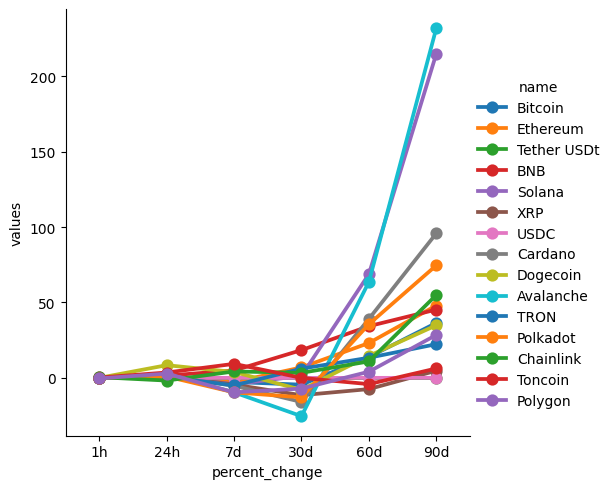

In [73]:
sns.catplot(data = df8, x = 'percent_change', y = 'values', hue = 'name', kind = 'point', palette="tab10")

In [78]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,41669.51,2024-01-21 23:38:56.471723
15,Bitcoin,41670.83,2024-01-21 23:40:04.429775


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

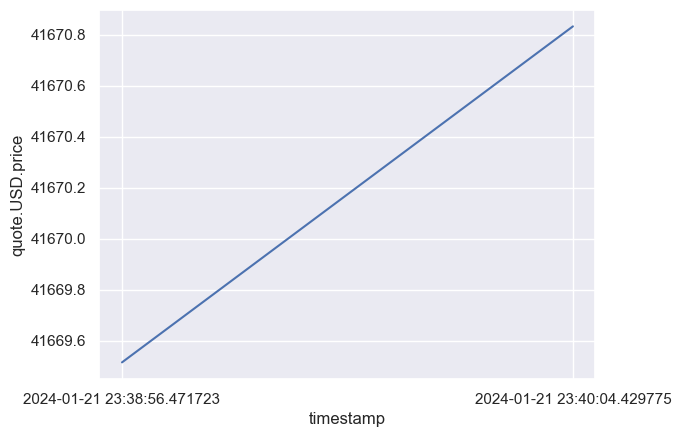

In [79]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(data = df9, x = 'timestamp', y = 'quote.USD.price')